
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## Original Matlab TCs database and MDA selection

inputs required: 
  * ROI original matlab input data

in this notebook:
  * Analysis of matlab TCs
  * Database and MDA selection parse from matlab to .nc files

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import xarray as xr
import numpy as np

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.io.matlab import ReadMatfile

from teslakit.plotting.storms import Plot_TCs_Params_MDAvsSIM, \
Plot_TCs_Params_HISTvsSIM, Plot_TCs_Params_HISTvsSIM_histogram



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/nico/Projects/TESLA-kit/TeslaKit/data'
db = Database(p_data)

# set site
db.SetSite('ROI')


In [3]:
# --------------------------------------
# load original matlab TCs RBFs training subset and dataset

# we are using matching matlab files for KWAJALEIN TCs simulations
p_matlab_files = op.join(p_data, 'sites', 'ROI', 'TCs', 'matlab_original')
p_subset = op.join(p_matlab_files, 'MDA_1000.mat')
p_dataset = op.join(p_matlab_files, 'MULTIVARIATE_100000parameters.mat')


In [4]:
# load simulated storms parameters - dataset
dm = ReadMatfile(p_dataset)

# store simulated storms - parameters 
TCs_r2_sim_params = xr.Dataset(
    {
        'pressure_mean':(('storm'), dm['PMEAN1']),
        'pressure_min':(('storm'), dm['PMIN1']),
        'velocity_mean':(('storm'), dm['VMEAN']),
        'delta':(('storm'), dm['DELTA']),
        'gamma':(('storm'), dm['GAMMA']),
    },
    coords = {
        'storm':(('storm'), np.arange(len(dm['PMEAN1'])))    
    },
)
print(TCs_r2_sim_params)

#db.Save_TCs_r2_sim_params(TCs_r2_sim_params)


<xarray.Dataset>
Dimensions:        (storm: 100000)
Coordinates:
  * storm          (storm) int64 0 1 2 3 4 5 ... 99995 99996 99997 99998 99999
Data variables:
    pressure_mean  (storm) float64 986.2 968.6 1.006e+03 ... 981.6 998.4
    pressure_min   (storm) float64 986.2 968.6 1.006e+03 ... 981.6 998.4
    velocity_mean  (storm) float64 19.72 32.1 13.56 22.1 ... 14.6 13.28 32.43
    delta          (storm) float64 117.7 167.6 137.8 96.91 ... 105.3 212.0 131.6
    gamma          (storm) float64 121.9 108.6 118.5 122.5 ... 102.4 122.7 129.5


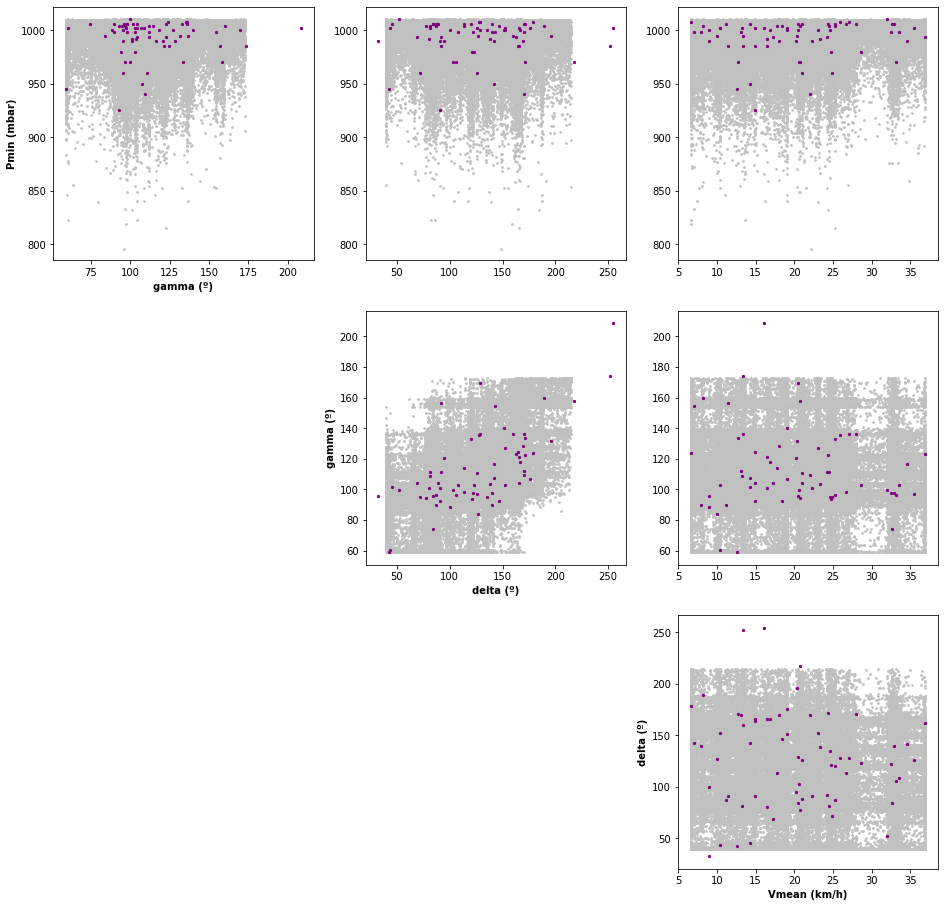

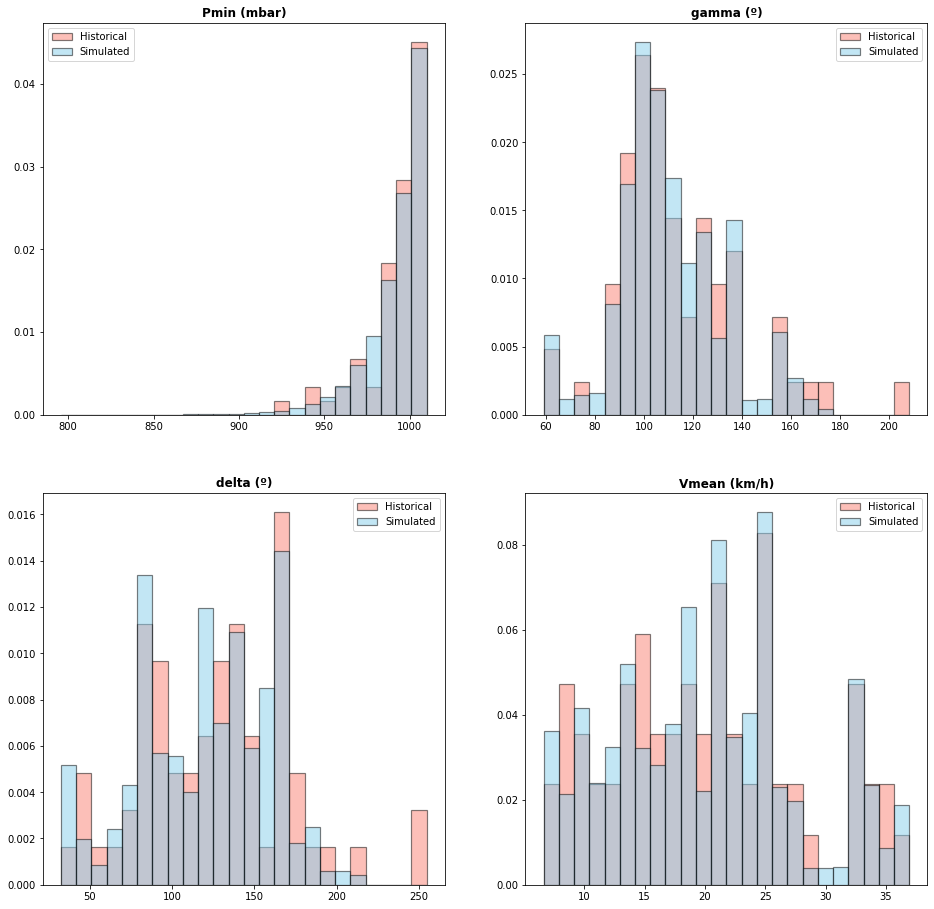

In [5]:
# Historical vs Simulation parameters: 
_, TCs_r2_hist_params = db.Load_TCs_r2_hist()  # historical TCs parameters inside radius 2

# scatter plot
Plot_TCs_Params_HISTvsSIM(TCs_r2_hist_params, TCs_r2_sim_params);

# histogram
Plot_TCs_Params_HISTvsSIM_histogram(TCs_r2_hist_params, TCs_r2_sim_params);


In [6]:
# load simulated storms parameters - MDA subset
dm = ReadMatfile(p_subset)['Subset']  # pmean, vmean, gamma, delta

# store MDA storms - parameters 
TCs_r2_MDA_params = xr.Dataset(
    {
        'pressure_mean':(('storm'), dm[:,0]),
        'pressure_min':(('storm'), dm[:,0]),
        'velocity_mean':(('storm'), dm[:,1]),
        'delta':(('storm'), dm[:,3]),
        'gamma':(('storm'), dm[:,2]),
    },
    coords = {
        'storm':(('storm'), np.arange(len(dm[:,0])))    
    },
)
print(TCs_r2_MDA_params)

db.Save_TCs_r2_mda_params(TCs_r2_MDA_params)


<xarray.Dataset>
Dimensions:        (storm: 1000)
Coordinates:
  * storm          (storm) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    pressure_mean  (storm) float64 1.011e+03 1.007e+03 862.8 ... 985.7 960.3
    pressure_min   (storm) float64 1.011e+03 1.007e+03 862.8 ... 985.7 960.3
    velocity_mean  (storm) float64 37.23 80.71 21.96 5.0 ... 20.57 27.18 24.66
    delta          (storm) float64 94.76 191.6 98.42 163.4 ... 83.79 81.79 128.0
    gamma          (storm) float64 80.54 265.6 132.9 231.1 ... 79.07 98.43 142.3


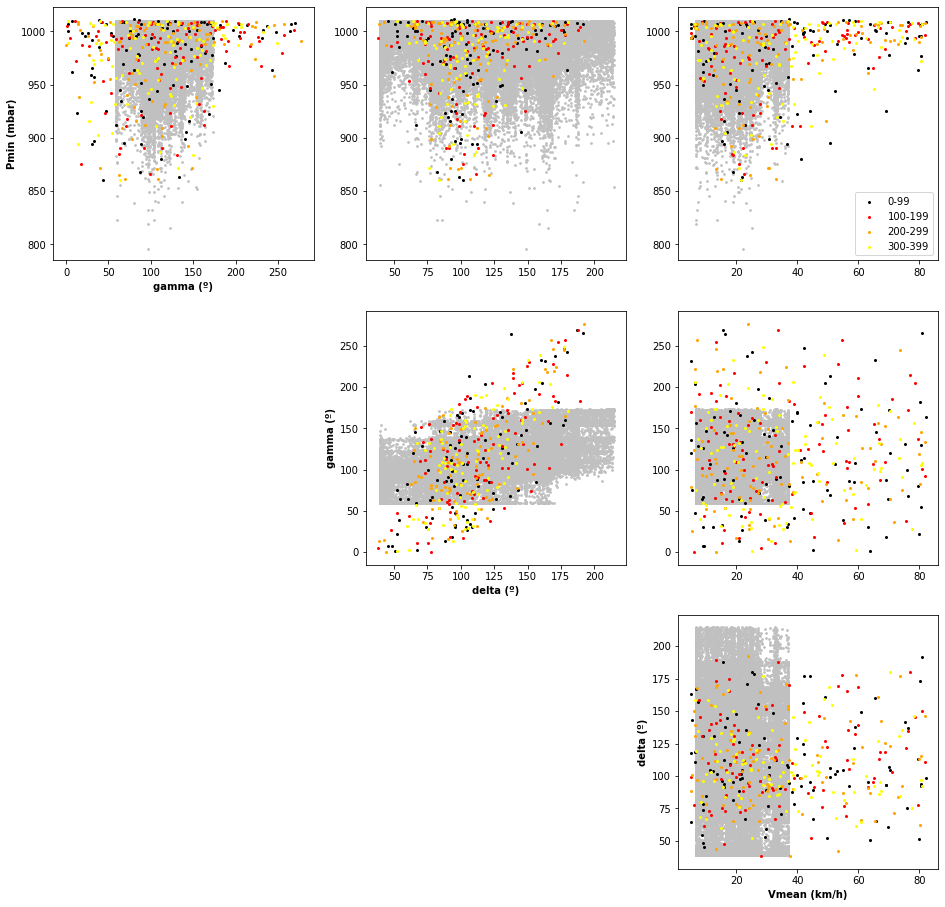

In [7]:
# Historical vs Simulated: scatter plot parameters
Plot_TCs_Params_MDAvsSIM(TCs_r2_MDA_params, TCs_r2_sim_params);
